In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Ex 1

In [2]:
def loadIris():
    f = open("iris.csv", "r")
    lines = f.readlines()
    D = []
    L = []

    for line in lines:
        fields = line.split(",")
        type = fields[4].strip("\n")
        if(type == "Iris-setosa"):
            L.append(0)
        elif(type == "Iris-versicolor"):
            L.append(1)
        else:
            L.append(2)
        D.append(fields[0:4])


    f.close()
    return (np.array(D, dtype=np.float64).T, np.array(L, dtype=np.int32))

In [3]:
(D, L) = loadIris()

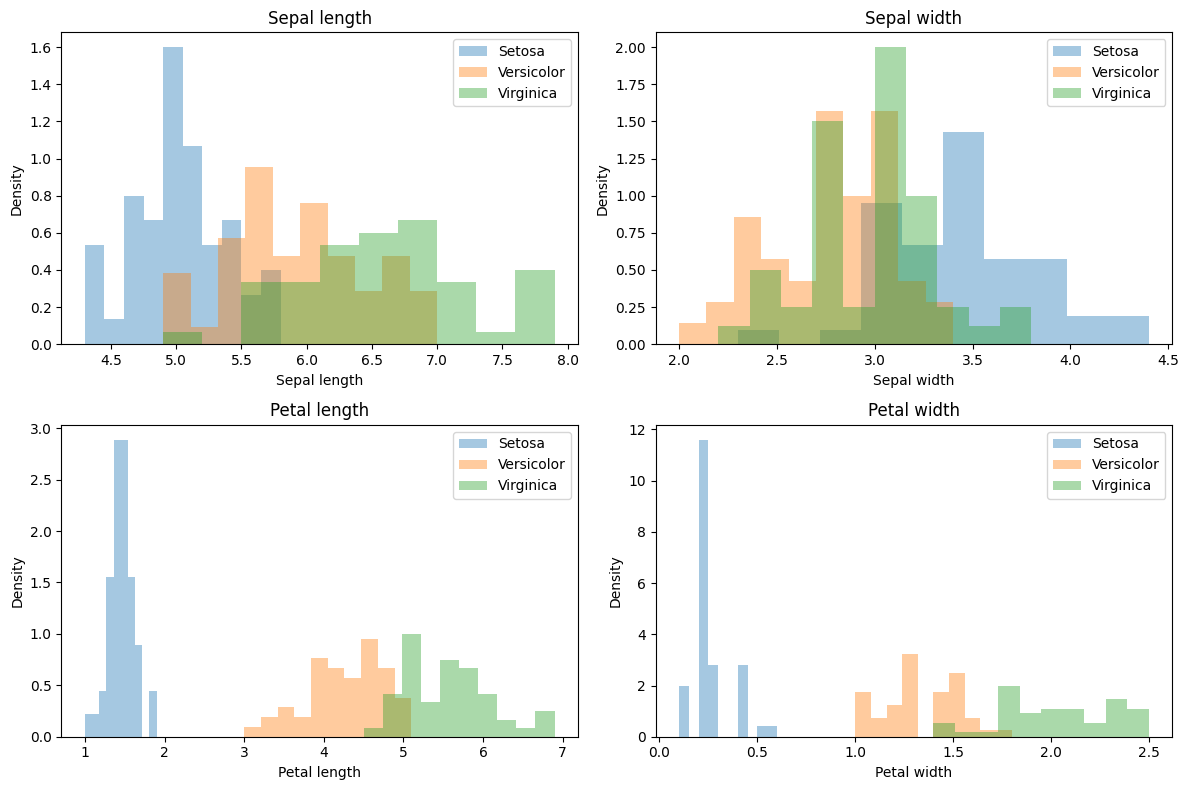

In [ ]:

labels = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
colors = ["red", "orange", "lightgreen"]
leg = ["Setosa", "Versicolor", "Virginica"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 righe, 2 colonne

for i, ax in enumerate(axes.flat):
    ax.set_title(labels[i])  # Aggiunge il titolo con il nome della feature
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Density")
    
    for j in range(3):
        ax.hist(D[i, L == j], bins=10, density=True, alpha=0.4, label=leg[j])
    
    ax.legend()

plt.tight_layout()
plt.show()


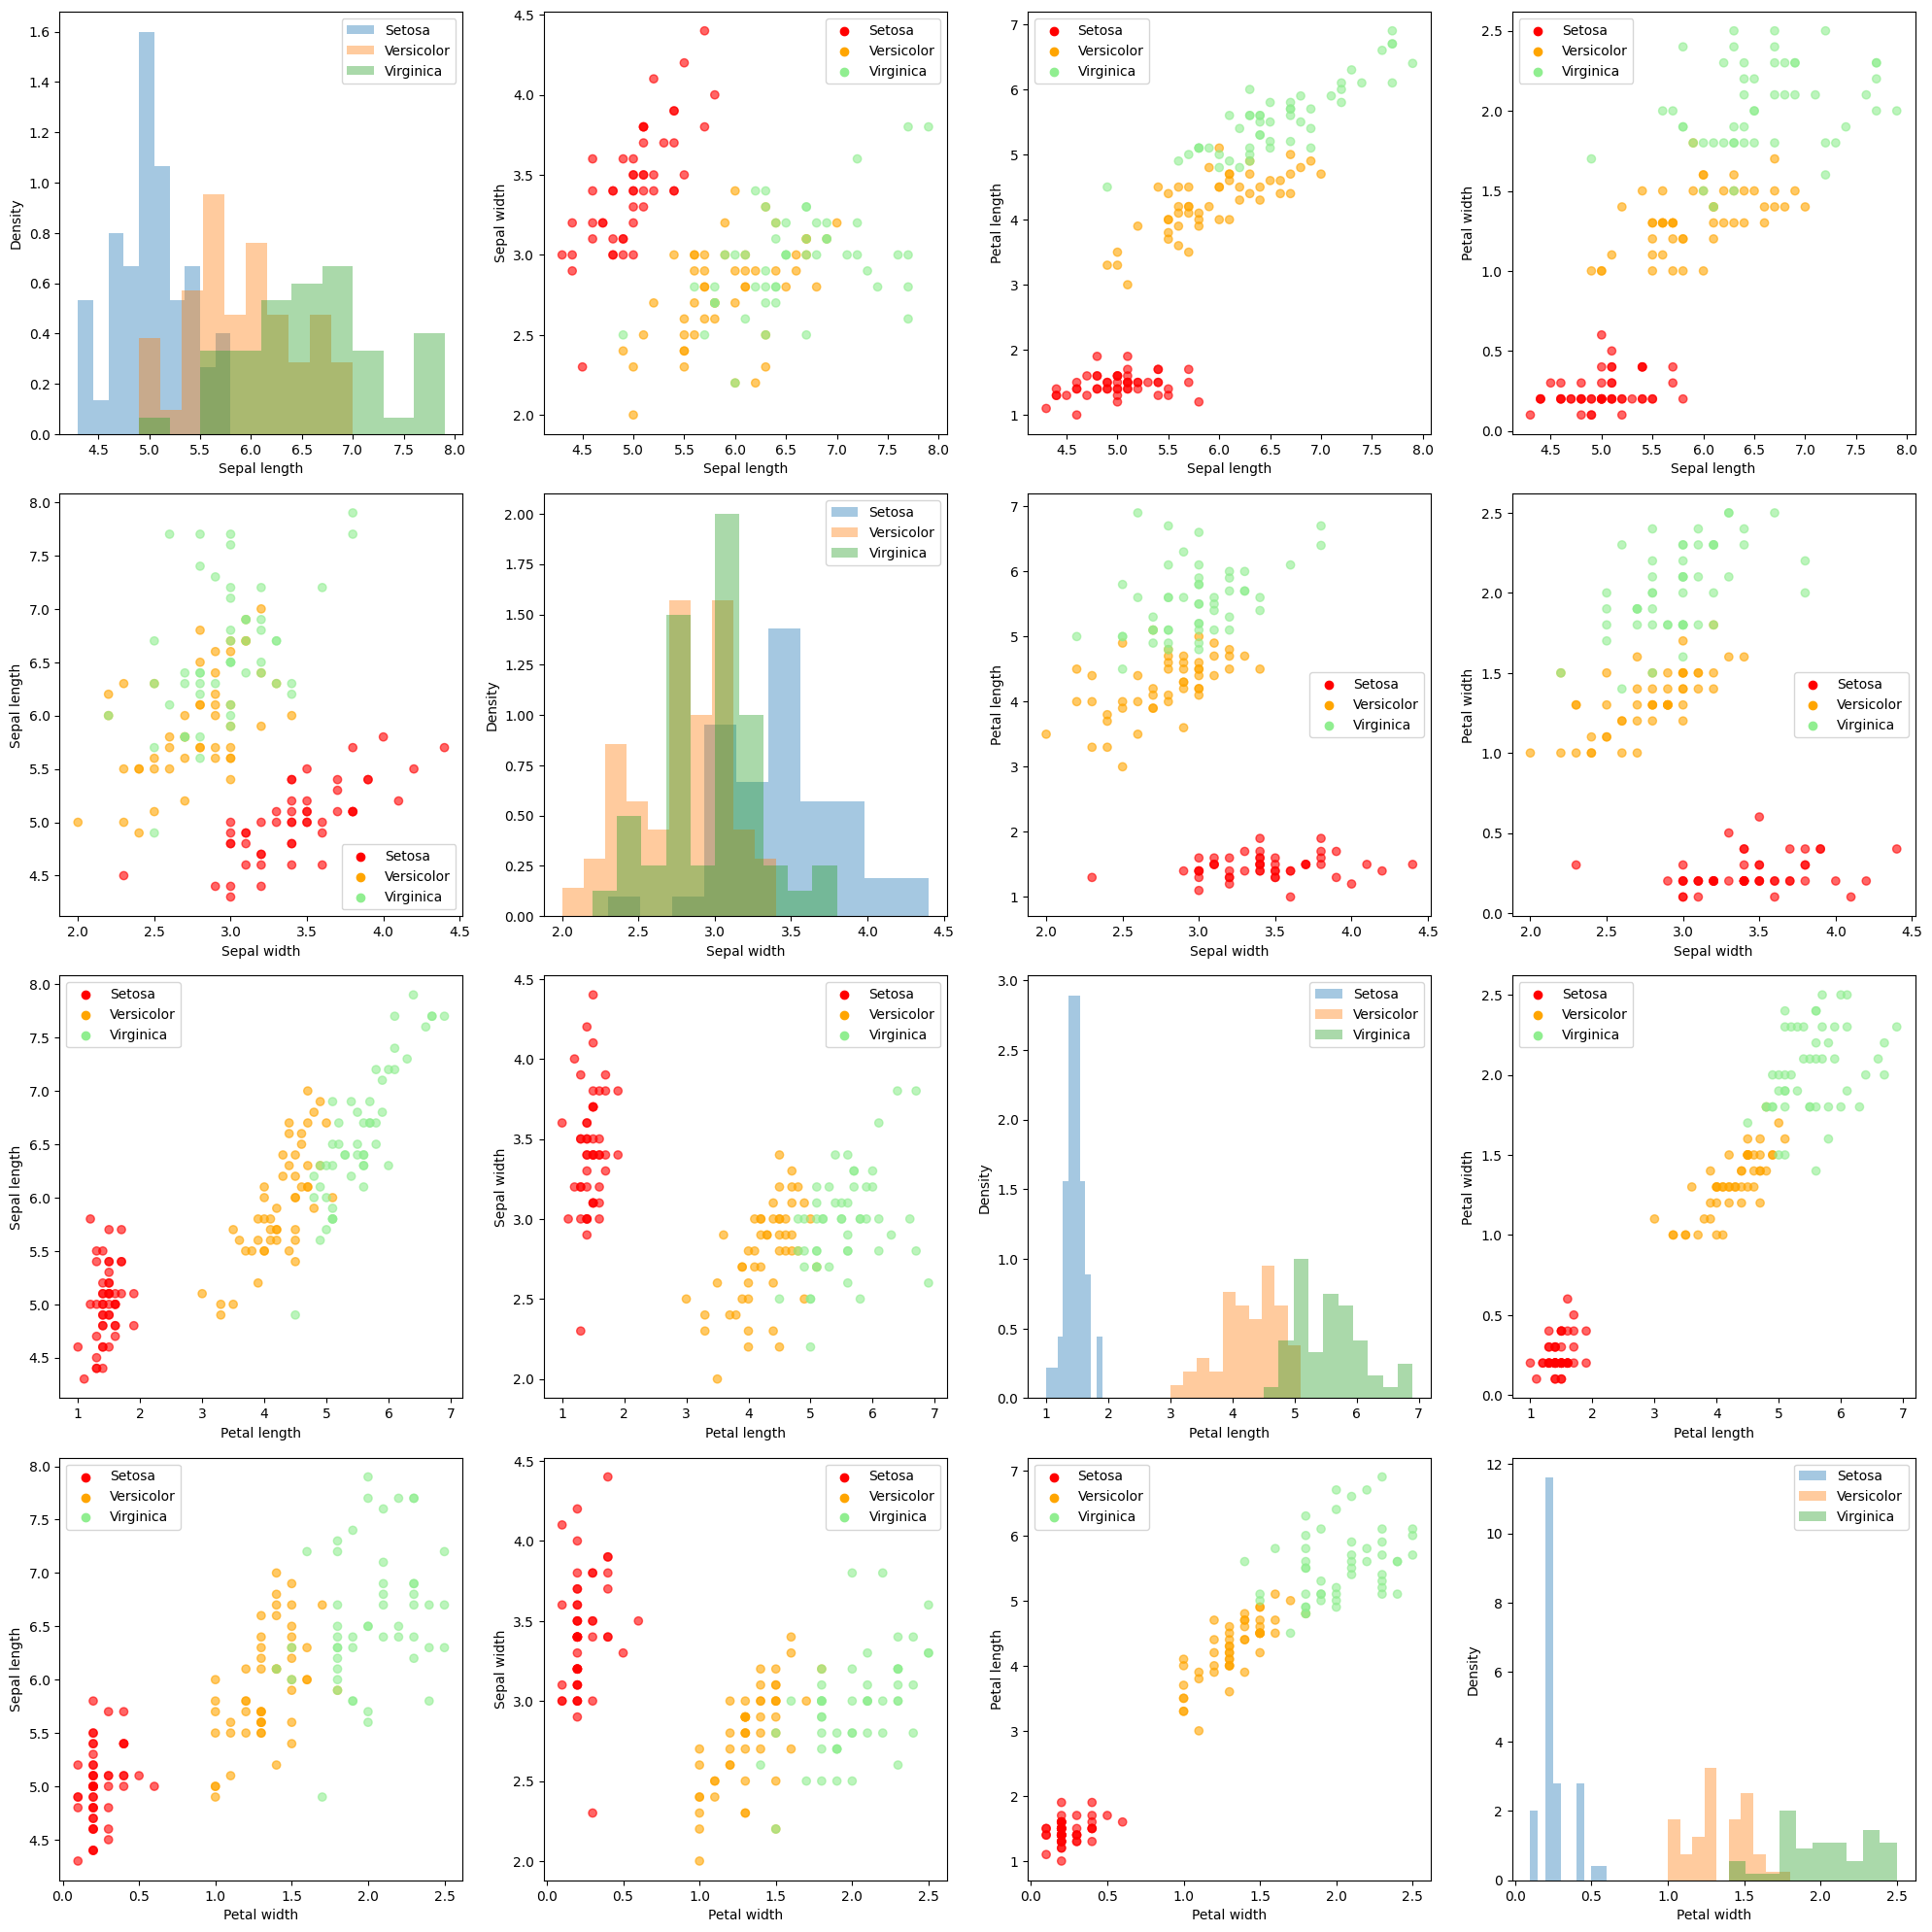

In [42]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # 4 righe, 4 colonne

for i in range(4):
    for j in range(4):
        if i != j:
            axes[i, j].scatter(D[i, :], D[j, :], c=L, cmap=mpl.colors.ListedColormap(colors), alpha=0.6)
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel(labels[j])
            # add legend to scatter plot with the values of leg array
            for k in range(3):
                axes[i, j].scatter([], [], c=colors[k], label=leg[k])
        else:
            for k in range(3):
                axes[i, j].hist(D[i, L == k], bins=10, density=True, alpha=0.4, label=leg[k])
            axes[i, j].set_xlabel(labels[i])
            axes[i, j].set_ylabel("Density")
        axes[i, j].legend()

plt.tight_layout()
plt.show()